In [8]:
import numpy as np
import math
from numpy.random import default_rng

In [9]:
# Proposal distribution
def Q(previous_x):
    return previous_x + rng.standard_normal(1)[0]

def Q_density(new_x, given):
    return (1/math.sqrt(2 * math.pi) ) * math.e**(-0.5 *((new_x - given)/1)**2)

# Unnormalised probability distribution we want to sample from
def P(x):
    return math.e**(-0.5 *((x - 5)/5)**2)

## Initialisation Step

In [10]:
rng = default_rng()
x_old = -10 # arbitrarily pick x_0 to be 0

## Iterative Steps

In [20]:
samples = []
while len(samples) < 4000000:
    # Generate random candidate x':
    proposal = Q(x_old)
    # calculate acceptance probability
    P_ratio = P(proposal)/P(x_old)
    Q_ratio = Q_density(x_old, proposal)/Q_density(proposal, x_old)
    acceptance_prob = min(1, P_ratio * Q_ratio)
    # accept or reject
    u = rng.random()
    if (u <= acceptance_prob):
        x_old = proposal
        samples.append(proposal)
    else:
        x_old = x_old
        samples.append(x_old)
    
    
    


In [21]:
from matplotlib import pyplot as plt

(array([4.85091500e-07, 0.00000000e+00, 1.21272875e-06, 3.88073200e-06,
        7.27637251e-06, 2.15865718e-05, 4.53560553e-05, 1.09145588e-04,
        2.22414453e-04, 4.41675811e-04, 8.54246132e-04, 1.50305601e-03,
        2.63162139e-03, 4.45993125e-03, 7.16043564e-03, 1.09536086e-02,
        1.61836226e-02, 2.27711652e-02, 3.10584684e-02, 4.00404226e-02,
        4.99952279e-02, 5.99396036e-02, 6.82902112e-02, 7.51430989e-02,
        7.89365144e-02, 7.96862233e-02, 7.66594949e-02, 7.07435615e-02,
        6.29435327e-02, 5.36557283e-02, 4.39272183e-02, 3.43587884e-02,
        2.55478290e-02, 1.83580453e-02, 1.27030911e-02, 8.33314434e-03,
        5.31175193e-03, 3.19214462e-03, 1.86202372e-03, 1.05507401e-03,
        5.40391931e-04, 2.85233802e-04, 1.37765986e-04, 5.86960716e-05,
        2.81353070e-05, 1.21272875e-05, 6.06364376e-06, 1.21272875e-06,
        9.70183001e-07, 4.85091500e-07]),
 array([-20.95166886, -19.92093548, -18.89020211, -17.85946873,
        -16.82873535, -15.7980

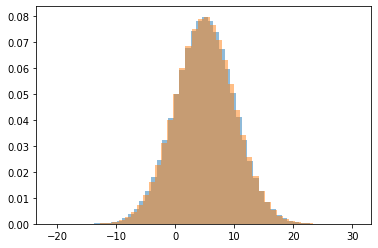

In [22]:
plt.hist(samples, bins=50, density=True, alpha=0.5)
plt.hist(rng.standard_normal(4000000) * 5 + 5, bins=50, density=True, alpha=0.5)